# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | fale old settlement
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | ad dabbah
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | arkhangel'sk
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | flin flon
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | marbella
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | thunder bay
Processing Record 21 of Set 1 | moran

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,24.39,79,100,6.36,PN,1707178724
1,fale old settlement,-9.3852,-171.2468,28.85,79,92,11.97,TK,1707178754
2,port-aux-francais,-49.3500,70.2167,6.11,78,98,12.71,TF,1707178722
3,port mathurin,-19.6833,63.4167,25.69,68,72,7.05,MU,1707178741
4,ad dabbah,18.0500,30.9500,15.10,19,87,6.37,SD,1707178881


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../Output data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../Output data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.39,79,100,6.36,PN,1707178724
1,fale old settlement,-9.3852,-171.2468,28.85,79,92,11.97,TK,1707178754
2,port-aux-francais,-49.3500,70.2167,6.11,78,98,12.71,TF,1707178722
3,port mathurin,-19.6833,63.4167,25.69,68,72,7.05,MU,1707178741
4,ad dabbah,18.0500,30.9500,15.10,19,87,6.37,SD,1707178881


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

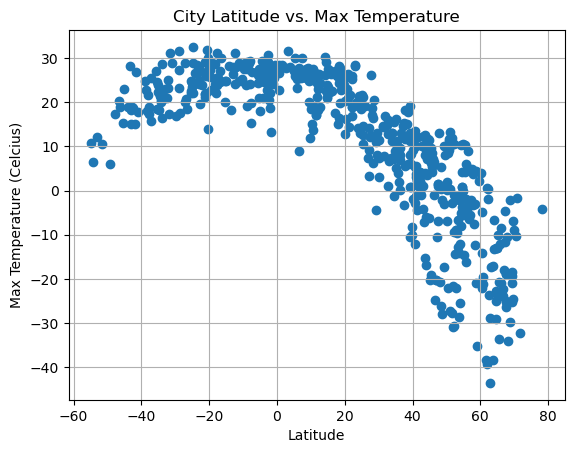

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (Celcius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

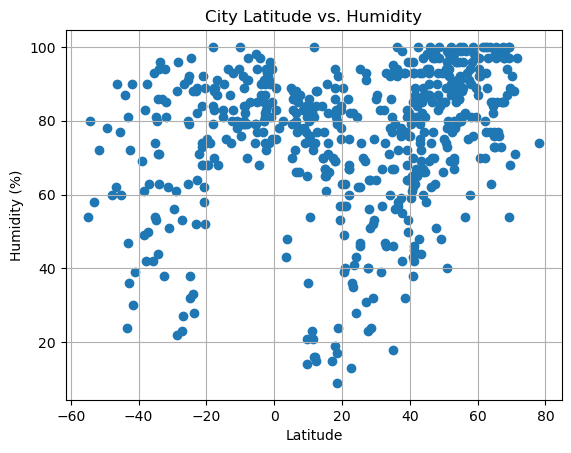

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

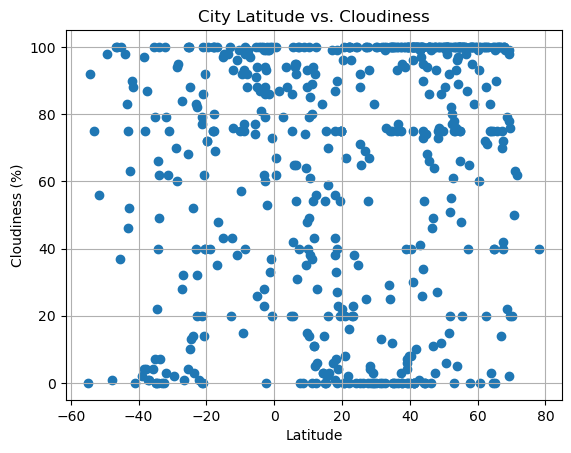

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

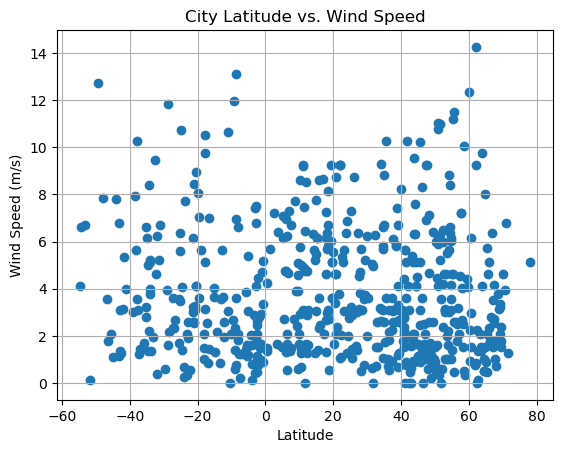

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../Output data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")

    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is: {rvalue}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,ad dabbah,18.0500,30.9500,15.10,19,87,6.37,SD,1707178881
5,arkhangel'sk,64.5401,40.5433,-24.93,82,0,1.00,RU,1707178746
10,iqaluit,63.7506,-68.5145,-17.15,77,75,1.54,CA,1707178807
12,flin flon,54.7682,-101.8650,-0.09,100,100,3.09,CA,1707178752
13,jamestown,42.0970,-79.2353,-0.23,84,100,4.12,US,1707178728


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.39,79,100,6.36,PN,1707178724
1,fale old settlement,-9.3852,-171.2468,28.85,79,92,11.97,TK,1707178754
2,port-aux-francais,-49.3500,70.2167,6.11,78,98,12.71,TF,1707178722
3,port mathurin,-19.6833,63.4167,25.69,68,72,7.05,MU,1707178741
6,puerto natales,-51.7236,-72.4875,10.44,72,56,0.11,CL,1707178738


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8442526819766694


Text(0, 0.5, 'Max Temp')

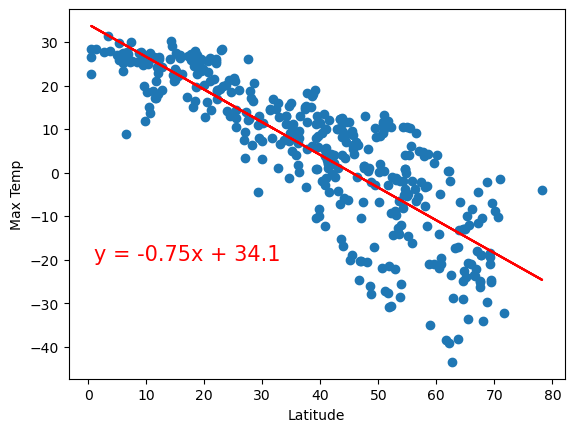

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (1,-20))

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

The r-value is: 0.5170828598703486


Text(0, 0.5, 'Max Temp')

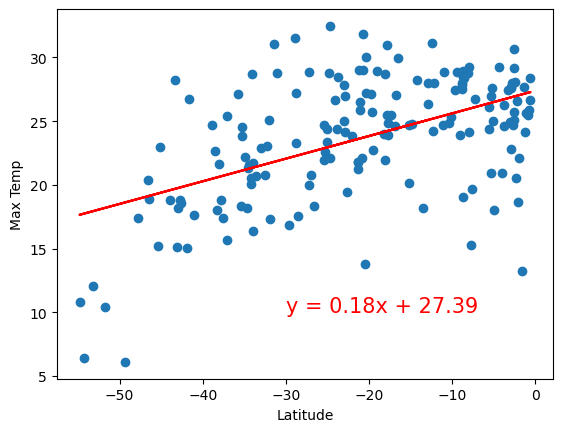

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (-30,10))

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The Northern Hemisphere has a strong negative linear relationship between Latitude and Max Temperature. 

The Southern Hemiphere has a Moderate to Weak positive linear relationship between Latitude and Max Temperature.

If the r value is 1 the relationship is strong, therefore there closer the absolute r value is to 1 the relationship is stronger and weaker when the absolute r is closer to 0.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23747990666612473


Text(0, 0.5, 'Cloudiness')

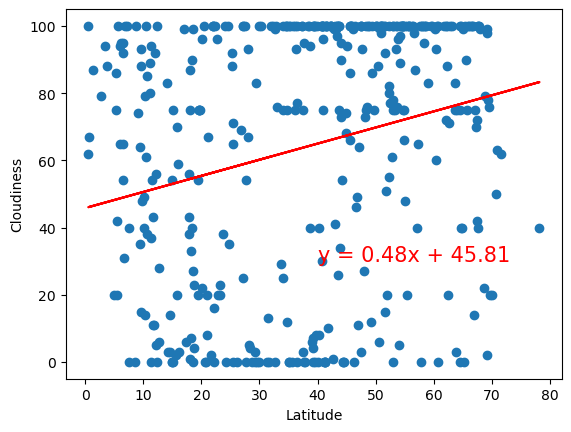

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (40,30))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

The r-value is: 0.278505575499683


Text(0, 0.5, 'Cloudiness')

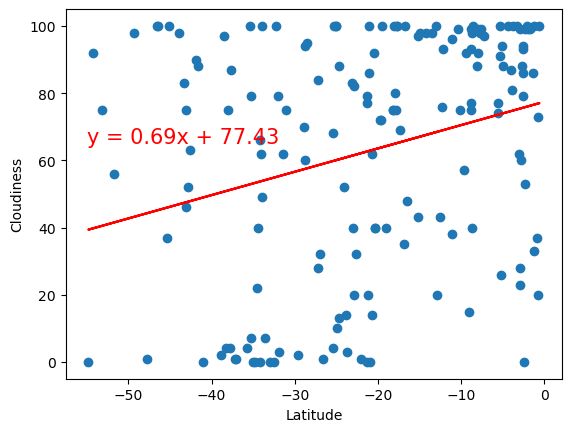

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (-55,65))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** 

For both Northern Hemisphere and Southern Hemisphere, there is a weak positive linear relationship between Latitude and Cloudiness. This is because the r value is greater than 1. the r vaue is close to 0 therefore both relationships between xaxis and y axis are weak.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23747990666612473


Text(0, 0.5, 'Cloudiness')

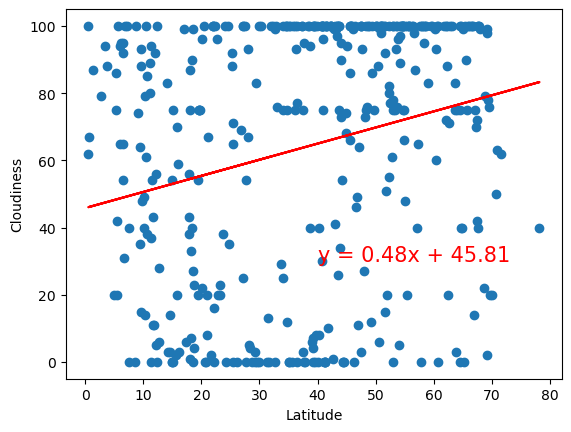

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (40,30))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

The r-value is: 0.278505575499683


Text(0, 0.5, 'Cloudiness')

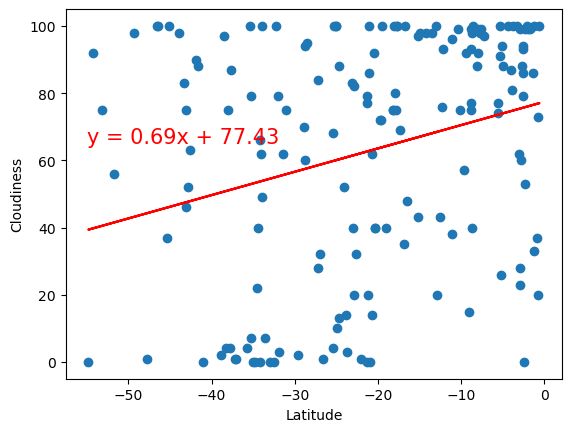

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (-55,65))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** 

The relationships between cloudiness and latitude are both weak positive relationships for both Northern Hemisphere and Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.10231590127322662


Text(0, 0.5, 'Wind Speed')

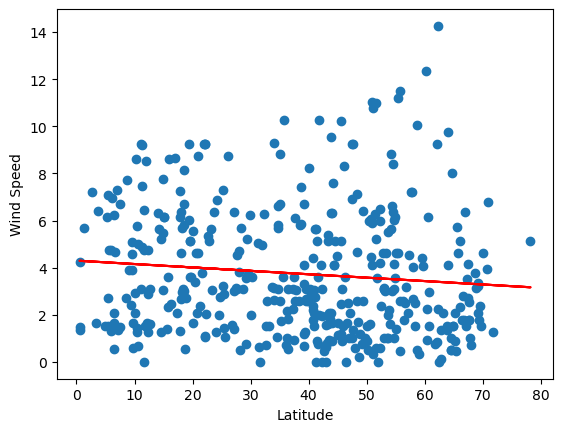

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")

plot_linear_regression(x_values, y_values, "Wind Speed", (0,15))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

The r-value is: -0.191558201816545


Text(0, 0.5, 'Wind Speed')

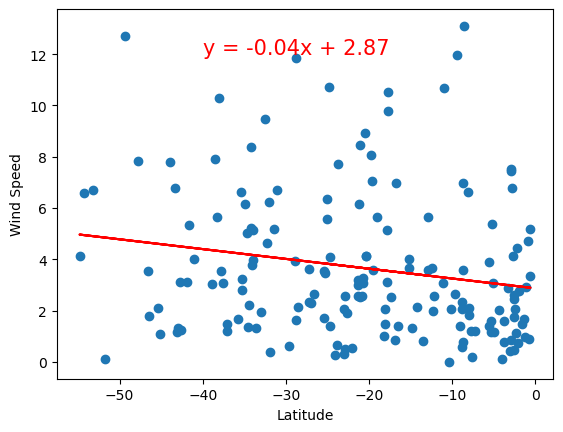

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")

plot_linear_regression(x_values, y_values, "Wind Speed", (-40,12))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The relationships between wind speed and latitude are both weak positive relationships for both Northern Hemisphere and Southern Hemisphere.